# Detection of Fake / Real Profiles 

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import keras as k
import gender_guesser.detector as gender

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
df_users = pd.read_csv("users.csv")
df_fusers = pd.read_csv("fusers.csv")

In [274]:
df_fusers.shape

(1337, 34)

In [275]:
df_users.shape

(1481, 34)

In [277]:
#for df_fusers
isFake = np.zeros(1337)

#for df_users
isNotFake = np.ones(1481)

In [278]:
#adding is fake or not column to make predictions for it
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake


In [279]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [280]:
#to shuffle the whole data
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [282]:
df_allUsers.describe()

id  statuses_count  followers_count  friends_count  \
count  2.818000e+03     2818.000000      2818.000000    2818.000000   
mean   5.374889e+08     1672.198368       371.105039     395.363023   
std    2.977005e+08     4884.669157      8022.631339     465.694322   
min    3.610511e+06        0.000000         0.000000       0.000000   
25%    3.620867e+08       35.000000        17.000000     168.000000   
50%    6.162253e+08       77.000000        26.000000     306.000000   
75%    6.177673e+08     1087.750000       111.000000     519.000000   
max    1.391998e+09    79876.000000    408372.000000   12773.000000   

       favourites_count  listed_count  default_profile  default_profile_image  \
count       2818.000000   2818.000000           1728.0                    8.0   
mean         234.541164      2.818666              1.0                    1.0   
std         1445.847248     23.480430              0.0                    0.0   
min            0.000000      0.000000              1.0                    1.0   
25%            0.000000      0.000000              1.0                    1.0   
50%            0.000000      0.000000              1.0                    1.0   
75%           37.000000      1.000000              1.0                    1.0   
max        44349.000000    744.000000              1.0                    1.0   

       geo_enabled  profile_use_background_image  profile_background_tile  \
count        721.0                        2760.0                    489.0   
mean           1.0                           1.0                      1.0   
std            0.0                           0.0                      0.0   
min            1.0                           1.0                      1.0   
25%            1.0                           1.0                      1.0   
50%            1.0                           1.0                      1.0   
75%            1.0                           1.0                      1.0   
max            1.0                           1.0                      1.0   

         utc_offset  protected  verified       isFake  
count   1069.000000        0.0       0.0  2818.000000  
mean    1478.391020        NaN       NaN     0.525550  
std     8108.211889        NaN       NaN     0.499435  
min   -39600.000000        NaN       NaN     0.000000  
25%     3600.000000        NaN       NaN     0.000000  
50%     3600.000000        NaN       NaN     1.000000  
75%     3600.000000        NaN       NaN     1.000000  
max    36000.000000        NaN       NaN     1.000000

In [417]:
df_allUsers.head()

id     screen_name  statuses_count  followers_count  friends_count  \
0   623495065   jessicaterrel              37               12            290   
1   617060374  jeanellewarerk              30               19            304   
2   618499240      justicemnv              27               18            272   
3  1084115989        arefilos             185              101            133   
4  1090138922   MarziaGrigoli             103               88            229   

   favourites_count  listed_count                      created_at  url lang  \
0                 0             0  Sun Jul 01 06:53:10 +0000 2012  NaN   en   
1                 0             0  Sun Jun 24 12:01:39 +0000 2012  NaN   en   
2                 0             0  Mon Jun 25 22:32:33 +0000 2012  NaN   en   
3                22             1  Sat Jan 12 20:56:50 +0000 2013  NaN   it   
4               109             0  Mon Jan 14 20:55:28 +0000 2013  NaN   it   

   ... profile_background_color profile_link_color  utc_offset  protected  \
0  ...                   C0DEED             0084B4         NaN        NaN   
1  ...                   C0DEED             0084B4         NaN        NaN   
2  ...                   C0DEED             0084B4         NaN        NaN   
3  ...                   C0DEED             0084B4         NaN        NaN   
4  ...                   0099B9             0099B9         NaN        NaN   

   verified                                        description  \
0       NaN                               emakna JELYPUENIA :D   
1       NaN  Collectible toy cars online auctions - Hot Whe...   
2       NaN                                          #folowbck   
3       NaN  Prima o poi metterò la testa a posto. Avventor...   
4       NaN         Pedagogista, educatrice e mamma di 2 bimbi   

               updated  dataset lang_num gender_is_code  
0  2015-02-14 10:40:01      INT        1              0  
1  2015-02-14 10:40:01      INT        1              0  
2  2015-02-14 10:40:01      INT        1              0  
3  2015-02-14 10:54:49      E13        5              0  
4  2015-02-14 10:54:49      E13        5              0  

[5 rows x 35 columns]

In [284]:
Y = df_allUsers.isFake

In [285]:
df_allUsers.drop(["isFake"], axis=1, inplace=True)
X = df_allUsers

In [286]:
pp.ProfileReport(X)

In [287]:
Y.reset_index(drop=True, inplace=True)

In [288]:
print(Y.shape)

(2818,)


In [290]:
X.head()

id             name     screen_name  statuses_count  \
0   623495065  Jessica Terrell   jessicaterrel              37   
1   617060374    Jeanelle Ware  jeanellewarerk              30   
2   618499240     Lita Justice      justicemnv              27   
3  1084115989   Simone De Vivo        arefilos             185   
4  1090138922   Marzia Grigoli   MarziaGrigoli             103   

   followers_count  friends_count  favourites_count  listed_count  \
0               12            290                 0             0   
1               19            304                 0             0   
2               18            272                 0             0   
3              101            133                22             1   
4               88            229               109             0   

                       created_at  url  ... profile_sidebar_fill_color  \
0  Sun Jul 01 06:53:10 +0000 2012  NaN  ...                     DDEEF6   
1  Sun Jun 24 12:01:39 +0000 2012  NaN  ...                     DDEEF6   
2  Mon Jun 25 22:32:33 +0000 2012  NaN  ...                     DDEEF6   
3  Sat Jan 12 20:56:50 +0000 2013  NaN  ...                     DDEEF6   
4  Mon Jan 14 20:55:28 +0000 2013  NaN  ...                     95E8EC   

                      profile_background_image_url profile_background_color  \
0  http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
1  http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
2  http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
3  http://a0.twimg.com/images/themes/theme1/bg.png                   C0DEED   
4  http://a0.twimg.com/images/themes/theme4/bg.gif                   0099B9   

   profile_link_color  utc_offset  protected verified  \
0              0084B4         NaN        NaN      NaN   
1              0084B4         NaN        NaN      NaN   
2              0084B4         NaN        NaN      NaN   
3              0084B4         NaN        NaN      NaN   
4              0099B9         NaN        NaN      NaN   

                                         description              updated  \
0                               emakna JELYPUENIA :D  2015-02-14 10:40:01   
1  Collectible toy cars online auctions - Hot Whe...  2015-02-14 10:40:01   
2                                          #folowbck  2015-02-14 10:40:01   
3  Prima o poi metterò la testa a posto. Avventor...  2015-02-14 10:54:49   
4         Pedagogista, educatrice e mamma di 2 bimbi  2015-02-14 10:54:49   

  dataset  
0     INT  
1     INT  
2     INT  
3     E13  
4     E13  

[5 rows x 34 columns]

In [292]:
def determine_gender(name):
    d = gender.Detector(case_sensitive = False)
    first_name = str(name).split(' ')[0]
    gender_is = d.get_gender(u"{}".format(first_name))
    gender_code_dict = {"female":-2, "mostly_female":-1, "unknown":0, "andy":0, "mostly_male":1, "male":2}
    gender_is_code = gender_code_dict[gender_is]
    return gender_is_code

In [294]:
lang_list = list(enumerate(np.unique(X["lang"])))
lang_dict = {name : i for i, name in lang_list}
X.loc[:, "lang_num"] = X["lang"].map(lambda x: lang_dict[x]).astype(int)
X["gender_is_code"] = determine_gender(X["name"])
X.drop(["name"], axis=1, inplace=True)

In [295]:
X = X[[
    "statuses_count",
    "followers_count",
    "friends_count",
    "favourites_count",
    "gender_is_code",
    "lang_num",
    "listed_count",
    "geo_enabled",
    "utc_offset",
    "profile_use_background_image"
                        ]]

In [296]:
pp.ProfileReport(X)

In [297]:
X = X.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [298]:
pp.ProfileReport(X)

In [307]:
train_X, val_X, train_y, val_y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [308]:
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(2254, 10)
(564, 10)
(2254,)
(564,)


In [412]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

Epoch 1/40
2254/2254 [==============================] - 1s 623us/step - loss: 382.3656 - acc: 0.9082
Epoch 2/40
2254/2254 [==============================] - 0s 159us/step - loss: 124.9101 - acc: 0.8993
Epoch 3/40
2254/2254 [==============================] - 0s 152us/step - loss: 79.2092 - acc: 0.9091
Epoch 4/40
2254/2254 [==============================] - 0s 121us/step - loss: 59.9232 - acc: 0.9277
Epoch 5/40
2254/2254 [==============================] - 0s 134us/step - loss: 49.1567 - acc: 0.9193
Epoch 6/40
2254/2254 [==============================] - 0s 118us/step - loss: 40.9416 - acc: 0.9122
Epoch 7/40
2254/2254 [==============================] - 0s 134us/step - loss: 34.3709 - acc: 0.9401
Epoch 8/40
2254/2254 [==============================] - 0s 174us/step - loss: 30.1367 - acc: 0.9113
Epoch 9/40
2254/2254 [==============================] - 0s 181us/step - loss: 26.8054 - acc: 0.9193
Epoch 10/40
2254/2254 [==============================] - 0s 132us/step - loss: 23.9238 - acc: 0.91

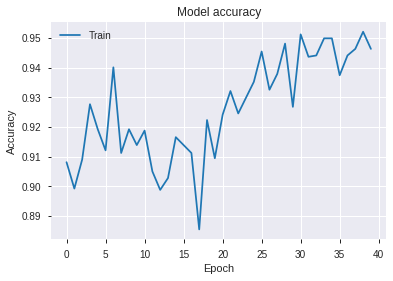

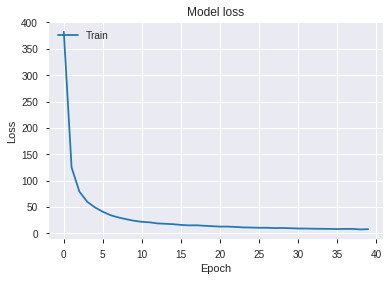

In [415]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.001),
                activity_regularizer=regularizers.l1(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=40)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [416]:
score, acc = model.evaluate(val_X, val_y)
print(acc*100)

564/564 [==============================] - 0s 717us/step
97.1631204828303
